### Importing libraries

In [1]:
import os
import json
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.linalg import svd, qr
from sklearn.preprocessing import StandardScaler
from Functions import anoamly_detection
from main import OptimizingPlacement
from Functions.Optiming_functions import Shannon_nyquist_throrm
from Functions.video_generation import VideoGeneration
from Functions.Testing import Comparing_videos
from Functions.Optiming_functions import Filling_missed_data

In [2]:
placement = OptimizingPlacement()
anomaly_detection = anoamly_detection.AnomalyDetection()
nyquist_throrm = Shannon_nyquist_throrm.NyquistTheorem()
Filling_missed_data = Filling_missed_data.FillingMissedData()
reconstrucing_video = VideoGeneration()
testing_videos = Comparing_videos.ComparingVideos()

In [3]:
file_name = os.getenv('file_name')
sensor_data = os.getenv("folder_name")
zipped_file = os.getenv("ziped_file")
output_dir = os.getenv('sensor_heatmaps')
video_output = os.getenv('temperature_output')

In [4]:
combined_data, keys_list = placement.extracting_files(zipped_file, sensor_data)

In [5]:
combined_data.head()

,Time,Temperature,Humidity,Sensor ID,Sensor Name
0,2024-05-14 02:18:22,15.25,92.8,047D6,047D6 T/RH IP67
1,2024-05-04 21:21:36,13.95,71,047D6,047D6 T/RH IP67
2,2024-05-04 21:26:37,13.65,71.8,047D6,047D6 T/RH IP67
3,2024-05-04 21:31:35,13.4,72.6,047D6,047D6 T/RH IP67
4,2024-05-04 21:36:36,13.4,73.4,047D6,047D6 T/RH IP67


In [6]:
# placement.heatmap_video_gen(combined_data, output_dir, video_output)

In [7]:
combined_data.isnull().sum()

Time              0
Temperature    9351
Humidity       9351
Sensor ID         0
Sensor Name       0
dtype: int64

In [8]:
combined_data['Humidity'] = combined_data['Humidity'].astype('float')
combined_data['Temperature'] = combined_data['Temperature'].astype('float')

In [9]:
combined_data['Day'] = pd.DatetimeIndex(combined_data['Time']).day
combined_data['Time_Instance'] = pd.DatetimeIndex(combined_data['Time']).time
combined_data['Year'] = pd.DatetimeIndex(combined_data['Time']).year
combined_data['Month'] = pd.DatetimeIndex(combined_data['Time']).month

In [10]:
combined_data['flag'] = combined_data.isna().any(axis=1).astype(int)

In [11]:
final_dataset = placement.replacing_missing_values(combined_data)

Epoch 1/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 7.0991 - val_loss: 5.0454
Epoch 2/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 5.2272 - val_loss: 6.2675
Epoch 3/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 5.1166 - val_loss: 4.9536
Epoch 4/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 5.1197 - val_loss: 5.0509
Epoch 5/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 4.9048 - val_loss: 4.8692
Epoch 6/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 4.8853 - val_loss: 4.8878
Epoch 7/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 4.7417 - val_loss: 5.0158
Epoch 8/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 4.7321 - val_loss: 5.3468
Epoch 9/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 4.6745 - val_loss: 5.4708
Epoch 10/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 4.7317 - val_loss: 5.3628
Epoch 11/20
8008/8008 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 4.4671 - val_loss: 4.8420
Epoch 12/20
8008/80

In [12]:
final_dataset.iloc[1000]

Time             2024-05-07 10:34:40
Temperature                     24.8
Humidity                        51.0
Sensor ID                      047D6
Sensor Name          047D6 T/RH IP67
Day                                7
Time_Instance               10:34:40
Year                            2024
Month                              5
flag                               0
Name: 1000, dtype: object

In [13]:
final_dataset[(final_dataset['Sensor ID'] == '047D6') & (final_dataset['Day'] == 7) & (final_dataset['flag'] == 1)]

,Time,Temperature,Humidity,Sensor ID,Sensor Name,Day,Time_Instance,Year,Month,flag
987,2024-05-07 09:29:43,22.80,61.30,047D6,047D6 T/RH IP67,7,09:29:43,2024,5,1
1001,2024-05-07 10:39:40,25.34,52.88,047D6,047D6 T/RH IP67,7,10:39:40,2024,5,1
4528,2024-05-07 15:04:30,28.66,34.70,047D6,047D6 T/RH IP67,7,15:04:30,2024,5,1
4635,2024-05-07 22:59:12,14.70,81.06,047D6,047D6 T/RH IP67,7,22:59:12,2024,5,1


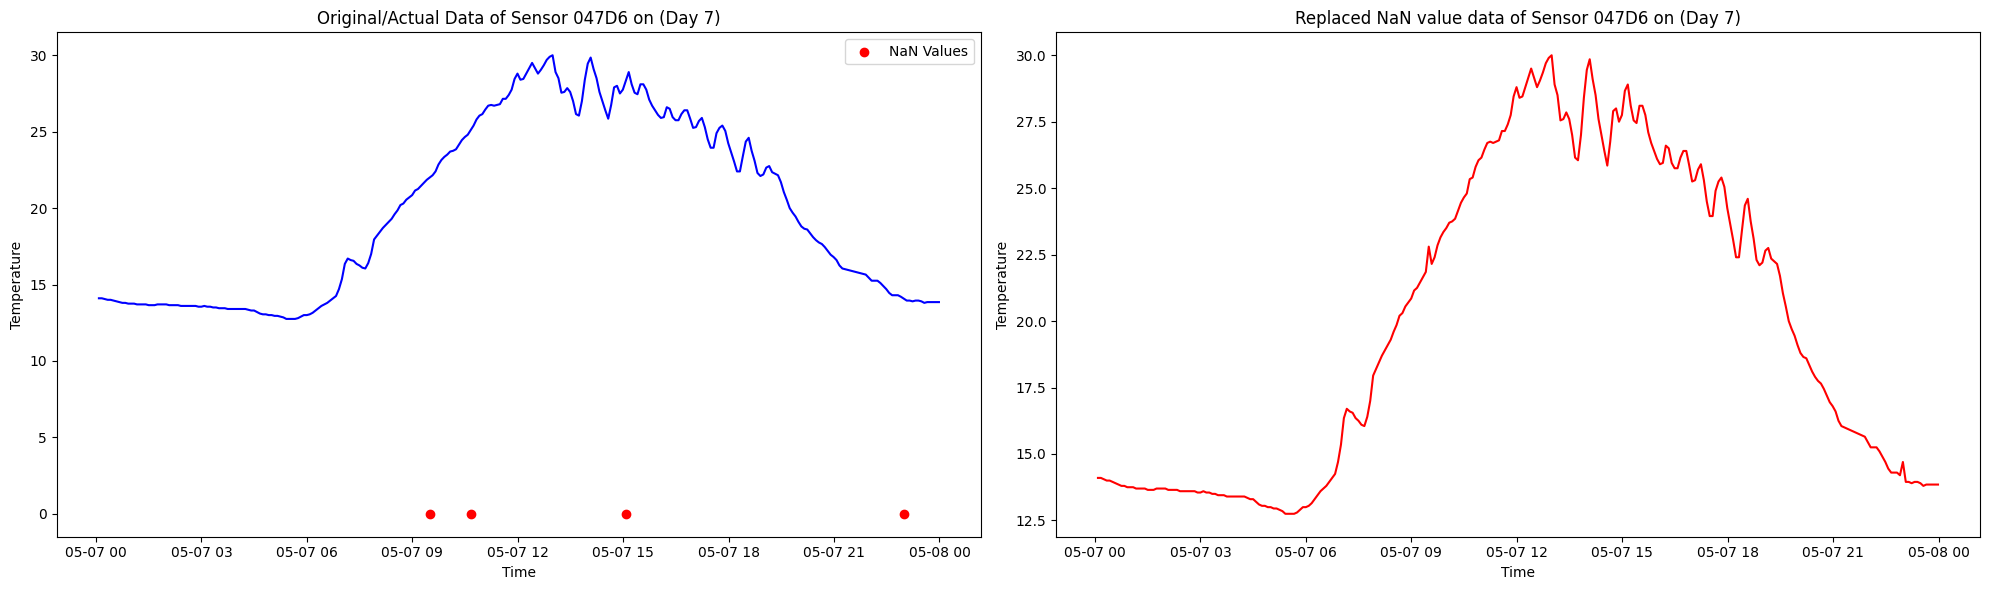

In [14]:
sample_data = combined_data[combined_data['Sensor ID'] == '047D6']
sample_final_data = final_dataset[final_dataset['Sensor ID'] == '047D6']

Non_Empty_data = sample_data[sample_data['Day'] == 7]
final_days = sample_final_data[sample_final_data['Day'] == 7]

Non_Empty_data = Non_Empty_data.sort_values(by='Time')
final_days = final_days.sort_values(by='Time')

# Identify NaN values
nan_indices = Non_Empty_data[Non_Empty_data['Temperature'].isna()].index

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first DataFrame
sns.lineplot(ax=axes[0], x='Time', y='Temperature', data=Non_Empty_data, color='blue')
axes[0].set_title('Original/Actual Data of Sensor 047D6 on (Day 7)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Temperature')

# Highlight NaN values
axes[0].scatter(Non_Empty_data.loc[nan_indices, 'Time'], [0]*len(nan_indices), color='red', marker='o', label='NaN Values')
axes[0].legend()

# Plot the second DataFrame
sns.lineplot(ax=axes[1], x='Time', y='Temperature', data=final_days, color='red')
axes[1].set_title('Replaced NaN value data of Sensor 047D6 on (Day 7)')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Temperature')

# Display the plots
plt.tight_layout()
plt.show()

In [15]:
final_dataset[final_dataset['flag'] == 1].head()

,Time,Temperature,Humidity,Sensor ID,Sensor Name,Day,Time_Instance,Year,Month,flag
358,2024-05-05 05:01:20,9.92,85.62,047D6,047D6 T/RH IP67,5,05:01:20,2024,5,1
851,2024-05-20 08:31:34,14.11,86.13,047D6,047D6 T/RH IP67,20,08:31:34,2024,5,1
987,2024-05-07 09:29:43,22.80,61.30,047D6,047D6 T/RH IP67,7,09:29:43,2024,5,1
1001,2024-05-07 10:39:40,25.34,52.88,047D6,047D6 T/RH IP67,7,10:39:40,2024,5,1
1038,2024-05-20 15:01:20,30.75,46.01,047D6,047D6 T/RH IP67,20,15:01:20,2024,5,1


In [16]:
anomalies_list = []
temperature_color = 'green'
humidity_color = 'blue'

for sensor_id, sensor_data in final_dataset.groupby('Sensor ID'):
    sensor_anomalies = anomaly_detection.detect_anomalies(sensor_data, sensor_id, temperature_color, humidity_color)
    anomalies_list.append(sensor_anomalies)

all_anomalies = pd.concat(anomalies_list)

In [17]:
non_anomalous_data = all_anomalies[(all_anomalies['Temperature_anomaly'] == 0) & (all_anomalies['Humidity_anomaly'] == 0)]

X_train = non_anomalous_data[['Temperature', 'Humidity']]
y_train_temp = non_anomalous_data['Temperature']
y_train_humidity = non_anomalous_data['Humidity']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
mlp_temp = anomaly_detection.training_anomaly_model(X_train_scaled, y_train_temp, '', 'temperature')

Epoch 1/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 12.1345 - val_loss: 1.0031e-04
Epoch 2/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0015 - val_loss: 4.9089e-05
Epoch 3/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0011 - val_loss: 0.0364
Epoch 4/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0013 - val_loss: 7.4557e-06
Epoch 5/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0011 - val_loss: 9.3894e-05
Epoch 6/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0011 - val_loss: 4.8899e-04
Epoch 7/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0018 - val_loss: 8.9856e-06
Epoch 9/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 10/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0011 - val_loss: 1.0963e-05
Epoch 11/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 6.5532e-04 - val

In [19]:
mlp_humidity = anomaly_detection.training_anomaly_model(X_train_scaled, '', y_train_humidity, 'humidity')

Epoch 1/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 226.4790 - val_loss: 0.0050
Epoch 2/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0117 - val_loss: 0.0213
Epoch 3/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0123 - val_loss: 9.3570e-04
Epoch 4/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0103 - val_loss: 0.0494
Epoch 5/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0107 - val_loss: 0.0128
Epoch 6/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0117 - val_loss: 2.6712e-04
Epoch 7/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0086 - val_loss: 1.1256e-04
Epoch 8/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0108 - val_loss: 0.0197
Epoch 9/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0117 - val_loss: 4.7930e-05
Epoch 10/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0102 - val_loss: 0.0058
Epoch 11/20
6172/6172 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0107 - val_loss: 2.0001e-

In [20]:
anomalies = all_anomalies[(all_anomalies['Temperature_anomaly'] == 1) & (all_anomalies['Humidity_anomaly'] == 1)].copy()

X_anomalies = anomalies[['Temperature', 'Humidity']]
X_anomalies_scaled = scaler.transform(X_anomalies)

anomalies.loc[anomalies['Temperature_anomaly'] == 1, 'Temperature'] = 0
anomalies.loc[anomalies['Humidity_anomaly'] == 1, 'Humidity'] = 0

In [21]:
anomalies['Temperature'] = np.round(mlp_temp.predict(X_anomalies_scaled), 2)
anomalies['Humidity'] = np.round(mlp_humidity.predict(X_anomalies_scaled), 2)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
all_anomalies.update(anomalies[['Temperature', 'Humidity']])
final_processed_data = all_anomalies.copy()

# final_anomalies = final_processed_data[(final_processed_data['Temperature_anomaly'] == 1) & (final_processed_data['Humidity_anomaly'] == 1)]

In [23]:
final_processed_data[(final_processed_data['Temperature_anomaly'] == 1) & (final_processed_data['Humidity_anomaly'] == 1)].head()

,Time,Temperature,Humidity,Sensor ID,Sensor Name,Day,Time_Instance,Year,Month,flag,Temperature_anomaly,Humidity_anomaly
75823,2024-05-20 12:18:36,33.849998,31.010000,0474D,0474D T/RH IP67,20,12:18:36,2024,5,0,1,1
75873,2024-05-20 13:18:34,33.900002,29.020000,0474D,0474D T/RH IP67,20,13:18:34,2024,5,0,1,1
75877,2024-05-20 13:38:33,32.599998,28.330000,0474D,0474D T/RH IP67,20,13:38:33,2024,5,0,1,1
232588,2024-04-30 12:18:06,31.549999,33.959999,04750,04750 T/RH IP67,30,12:18:06,2024,4,0,1,1
232590,2024-04-30 12:28:04,31.600000,34.259998,04750,04750 T/RH IP67,30,12:28:04,2024,4,0,1,1


In [24]:
lastday = final_processed_data['Time'].max().date()
last_day_records = final_processed_data[final_processed_data['Time'].dt.date == lastday]

sensor_sample_data = combined_data[combined_data['Time'].dt.date == lastday]

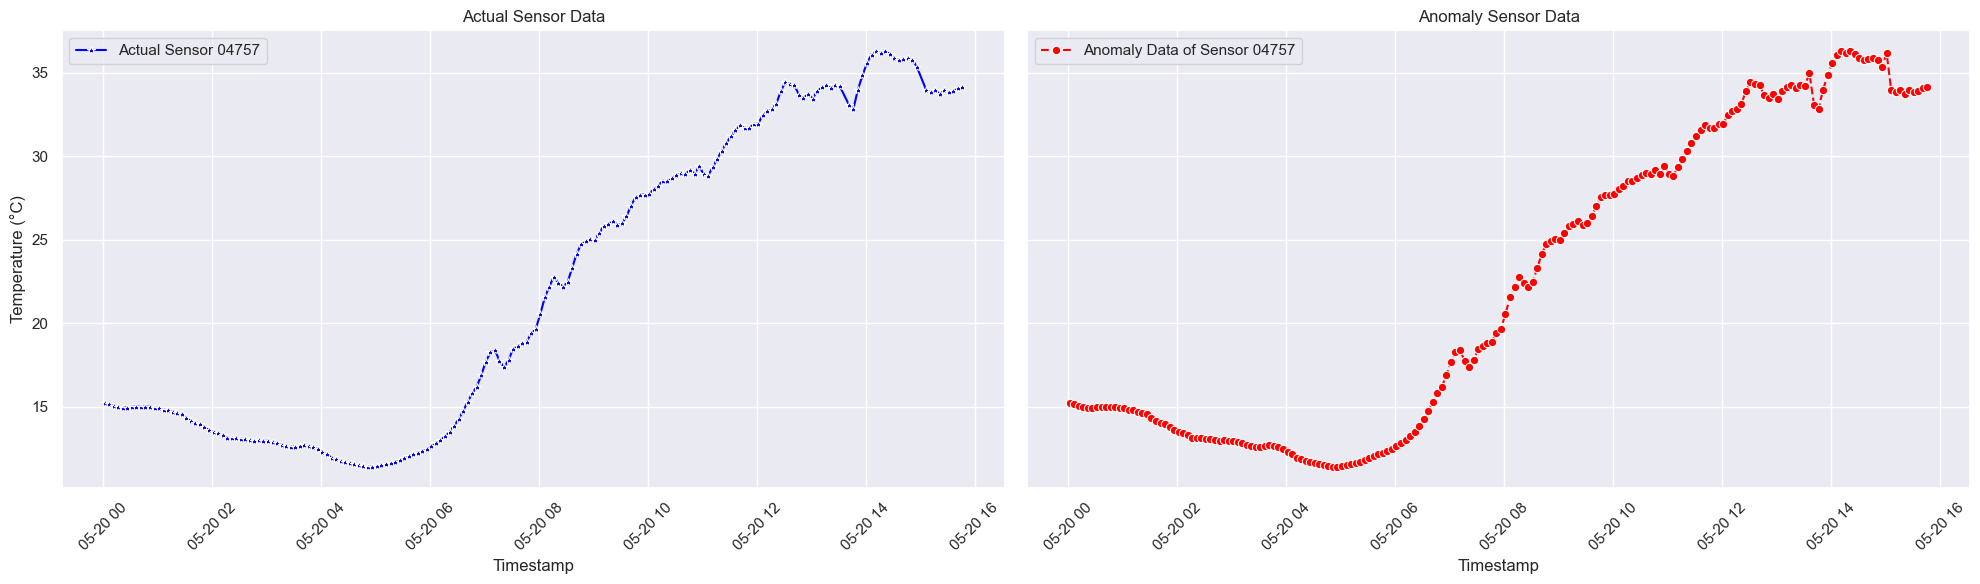

In [25]:
# Set style
sns.set(style="darkgrid")

# Create a figure with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Original data
sensor_data = sensor_sample_data[sensor_sample_data['Sensor ID'] == '04757']
sns.lineplot(ax=axs[0], x='Time', y='Temperature', data=sensor_data, 
             marker='*', color='blue',
             label='Actual Sensor 04757')

# Filtered data
filtered_sensor_data = last_day_records[last_day_records['Sensor ID'] == '04757']
sns.lineplot(ax=axs[1], x='Time', y='Temperature', data=filtered_sensor_data, 
             marker='o', color='red',
             linestyle='--', label='Anomaly Data of Sensor 04757')

# Titles and labels
axs[0].set_title('Actual Sensor Data')
axs[1].set_title('Anomaly Sensor Data')

for ax in axs:
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Temperature (°C)')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Compare/original_and_filtered_plots_side_by_side.png')
plt.show()

In [26]:
final_processed_data.to_csv('Combined_Data.csv', index=False)

In [27]:
final_dataset.columns

Index(['Time', 'Temperature', 'Humidity', 'Sensor ID', 'Sensor Name', 'Day',
       'Time_Instance', 'Year', 'Month', 'flag'],
      dtype='object')

In [28]:
placement.heatmap_video_gen(final_processed_data, output_dir, video_output, 'Temperature')

'Successfully generated the heatmap video.'

In [29]:
placement.heatmap_video_gen(final_processed_data, 'sensor_heatmaps/humidity', 'sensor_heatmaps_humidity_video.avi', 'Humidity')

'Successfully generated the heatmap video.'

In [3]:
temp_video_file_path = 'sensor_heatmaps_temperature_video.avi'

In [4]:
humidity_video_file_path = 'sensor_heatmaps_humidity_video.avi'

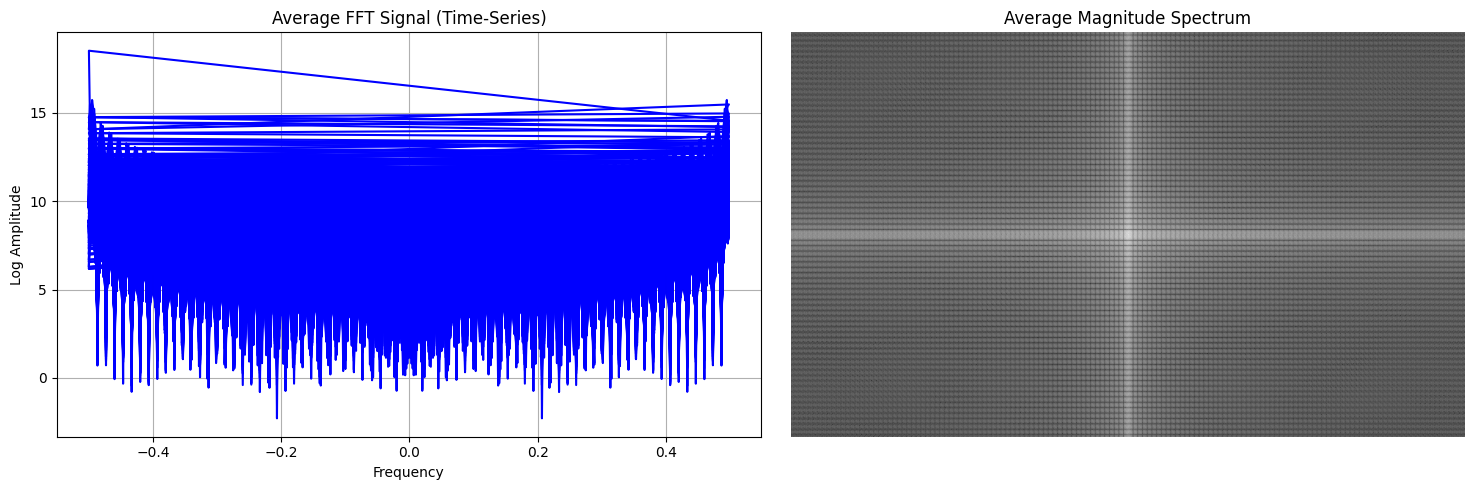

In [5]:
# Process the video and compute average FFT
fft_avg, magnitude_spectrum_avg = nyquist_throrm.process_video_fft_average(temp_video_file_path)

# Plot the average FFT signal and its magnitude spectrum
plt.figure(figsize=(15, 5))

# Compute the frequency values for the x-axis
freq_values = np.fft.fftfreq(fft_avg.shape[0])

plt.subplot(1, 2, 1)
plt.plot(freq_values, np.log(np.abs(fft_avg)), color='b')
plt.title('Average FFT Signal (Time-Series)')
plt.xlabel('Frequency')
plt.ylabel('Log Amplitude')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_avg, cmap='gray')
plt.title('Average Magnitude Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()

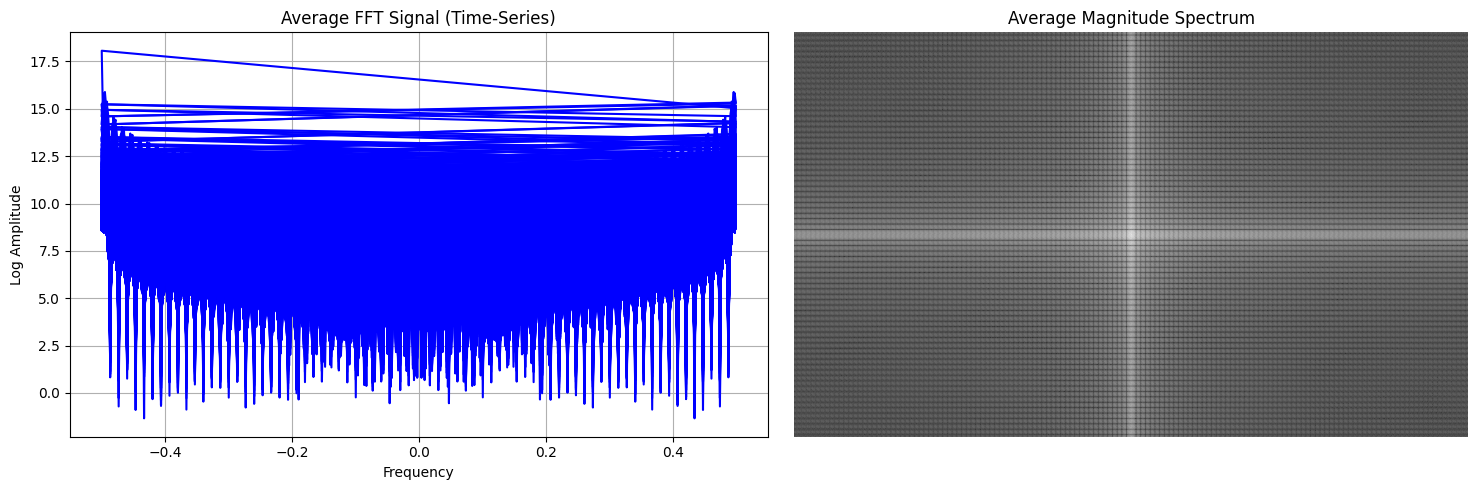

In [6]:
# Process the video and compute average FFT
fft_humid_avg, magnitude_humid_spectrum_avg = nyquist_throrm.process_video_fft_average(humidity_video_file_path)

# Plot the average FFT signal and its magnitude spectrum
plt.figure(figsize=(15, 5))

# Compute the frequency values for the x-axis
freq_humid_values = np.fft.fftfreq(fft_humid_avg.shape[0])

plt.subplot(1, 2, 1)
plt.plot(freq_humid_values, np.log(np.abs(fft_humid_avg)), color='b')
plt.title('Average FFT Signal (Time-Series)')
plt.xlabel('Frequency')
plt.ylabel('Log Amplitude')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.imshow(magnitude_humid_spectrum_avg, cmap='gray')
plt.title('Average Magnitude Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()

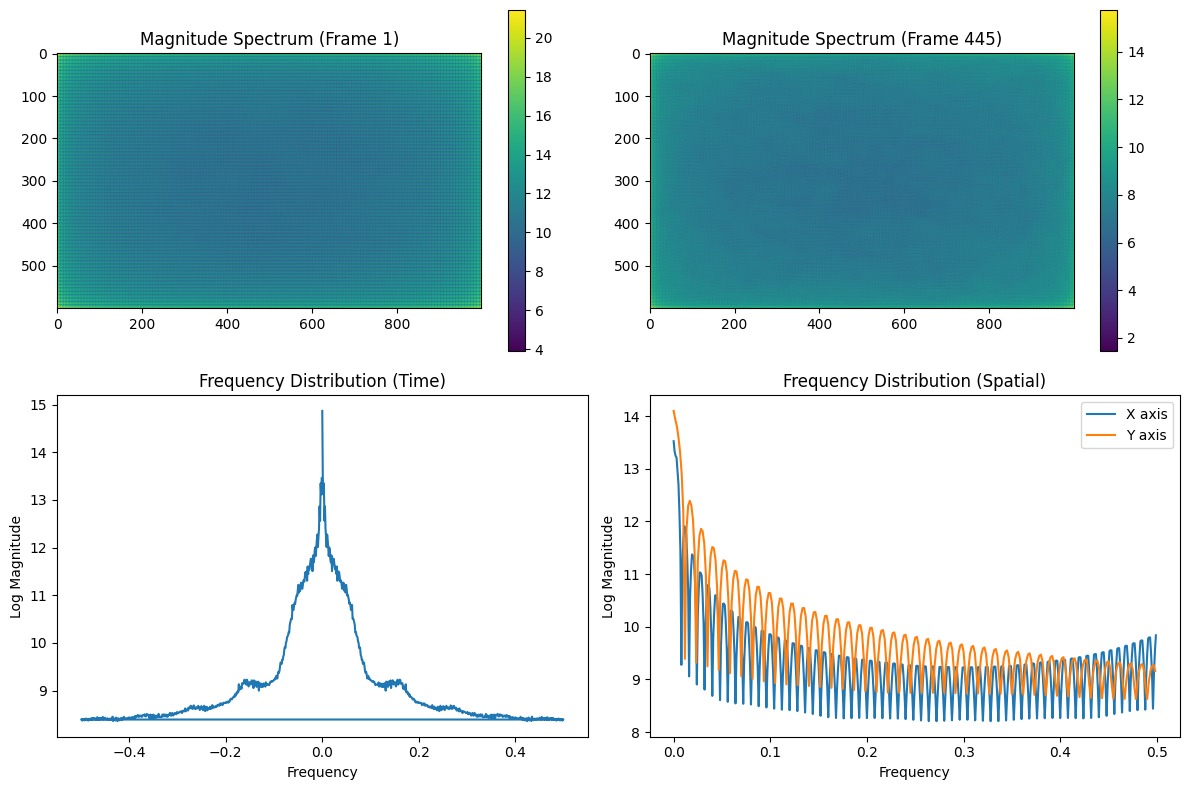

In [7]:
frame_count, width, height = nyquist_throrm.get_video_info(temp_video_file_path)
video_data = nyquist_throrm.read_video_file(temp_video_file_path)
results_step_1 = nyquist_throrm.reading_video(frame_count, width, height, video_data)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(np.log1p(results_step_1['magnitude_spectrum'][1]), cmap='viridis')
plt.title("Magnitude Spectrum (Frame 1)")
plt.colorbar()

middle_frame = frame_count // 2
plt.subplot(2, 2, 2)
plt.imshow(np.log1p(results_step_1['magnitude_spectrum'][middle_frame]), cmap='viridis')
plt.title(f"Magnitude Spectrum (Frame {middle_frame})")
plt.colorbar()

plt.subplot(2, 2, 3)
plt.plot(results_step_1['frequencies_time'], np.log1p(np.mean(results_step_1['magnitude_spectrum'], axis=(1, 2))))
plt.title("Frequency Distribution (Time)")
plt.xlabel("Frequency")
plt.ylabel("Log Magnitude")

plt.subplot(2, 2, 4)
plt.plot(results_step_1['frequencies_x'][:width//2], np.log1p(np.mean(results_step_1['magnitude_spectrum'], axis=(0, 2))[:width//2]), label='X axis')
plt.plot(results_step_1['frequencies_y'][:height//2], np.log1p(np.mean(results_step_1['magnitude_spectrum'], axis=(0, 1))[:height//2]), label='Y axis')
plt.title("Frequency Distribution (Spatial)")
plt.xlabel("Frequency")
plt.ylabel("Log Magnitude")
plt.legend()

plt.tight_layout()
plt.show()


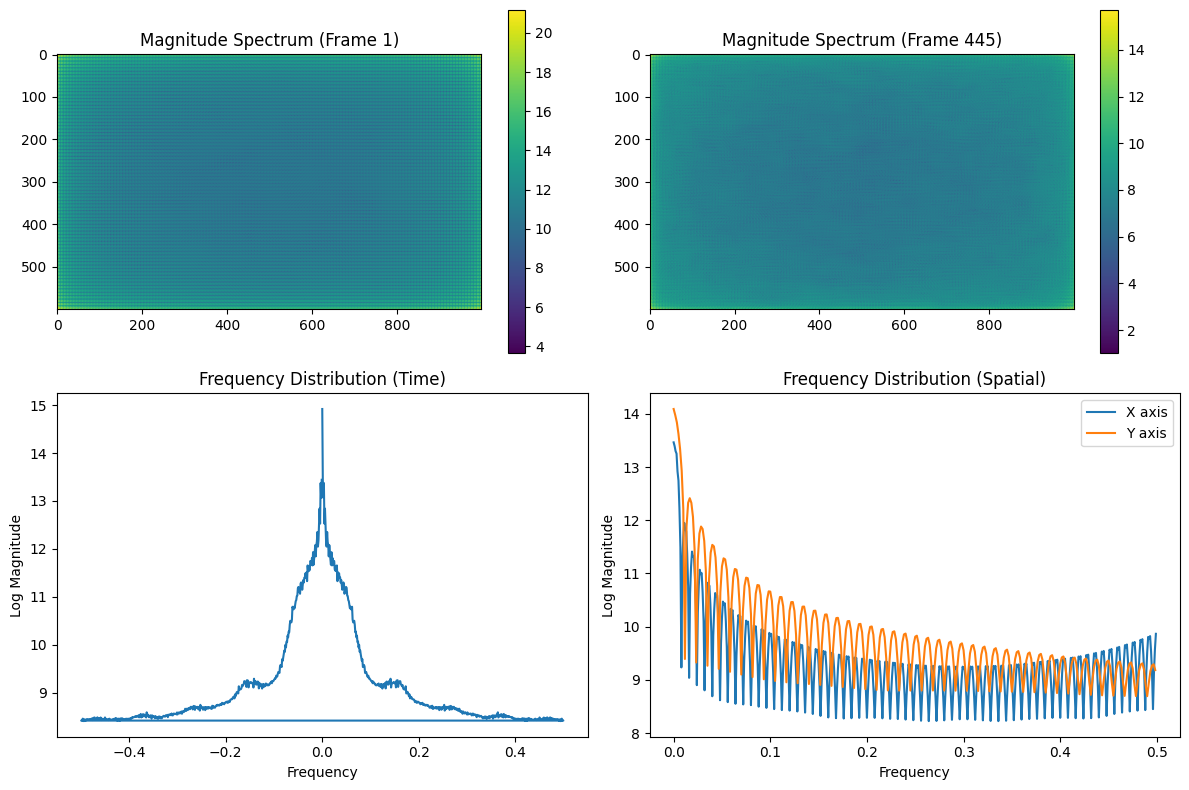

In [8]:
humid_frame_count, humid_width, humid_height = nyquist_throrm.get_video_info(humidity_video_file_path)
humid_video_data = nyquist_throrm.read_video_file(humidity_video_file_path)
humid_results_step_1 = nyquist_throrm.reading_video(humid_frame_count, humid_width, humid_height, humid_video_data)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(np.log1p(humid_results_step_1['magnitude_spectrum'][1]), cmap='viridis')
plt.title("Magnitude Spectrum (Frame 1)")
plt.colorbar()

middle_frame = humid_frame_count // 2
plt.subplot(2, 2, 2)
plt.imshow(np.log1p(humid_results_step_1['magnitude_spectrum'][middle_frame]), cmap='viridis')
plt.title(f"Magnitude Spectrum (Frame {middle_frame})")
plt.colorbar()

plt.subplot(2, 2, 3)
plt.plot(humid_results_step_1['frequencies_time'], np.log1p(np.mean(humid_results_step_1['magnitude_spectrum'], axis=(1, 2))))
plt.title("Frequency Distribution (Time)")
plt.xlabel("Frequency")
plt.ylabel("Log Magnitude")

plt.subplot(2, 2, 4)
plt.plot(humid_results_step_1['frequencies_x'][:humid_width//2], np.log1p(np.mean(humid_results_step_1['magnitude_spectrum'], axis=(0, 2))[:humid_width//2]), label='X axis')
plt.plot(humid_results_step_1['frequencies_y'][:humid_height//2], np.log1p(np.mean(humid_results_step_1['magnitude_spectrum'], axis=(0, 1))[:humid_height//2]), label='Y axis')
plt.title("Frequency Distribution (Spatial)")
plt.xlabel("Frequency")
plt.ylabel("Log Magnitude")
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
frame_count, width, height

(891, 1000, 600)

In [10]:
humid_frame_count, humid_width, humid_height

(891, 1000, 600)

In [11]:
video_data

array([[[162, 162, 162, ..., 231, 231, 231],
        [162, 162, 162, ..., 231, 231, 231],
        [162, 162, 162, ..., 231, 231, 231],
        ...,
        [243, 243, 243, ...,  87,  87,  87],
        [243, 243, 243, ...,  87,  87,  87],
        [243, 243, 243, ...,  87,  87,  87]],

       [[163, 163, 163, ..., 231, 231, 231],
        [163, 163, 163, ..., 231, 231, 231],
        [163, 163, 163, ..., 231, 231, 231],
        ...,
        [243, 243, 243, ..., 104, 104, 104],
        [243, 243, 243, ..., 104, 104, 104],
        [243, 243, 243, ..., 104, 104, 104]],

       [[163, 163, 163, ..., 231, 231, 231],
        [163, 163, 163, ..., 231, 231, 231],
        [163, 163, 163, ..., 231, 231, 231],
        ...,
        [242, 242, 242, ..., 122, 122, 122],
        [242, 242, 242, ..., 122, 122, 122],
        [242, 242, 242, ..., 122, 122, 122]],

       ...,

       [[155, 155, 155, ..., 221, 221, 221],
        [155, 155, 155, ..., 221, 221, 221],
        [155, 155, 155, ..., 221, 221, 221

In [12]:
results_step_1['fft_data']

array([[[ 9.75511544e+10-0.00000000e+00j,
          1.11685472e+09-2.34211464e+08j,
          9.48436957e+08-2.06908823e+09j, ...,
         -2.05791424e+09-9.87625359e+08j,
          9.48436957e+08+2.06908823e+09j,
          1.11685472e+09+2.34211464e+08j],
        [-5.48858591e+08-1.77798048e+09j,
         -4.66413853e+09-2.87460053e+07j,
         -1.50582841e+07-1.83600564e+09j, ...,
         -1.77924292e+09-3.06524908e+08j,
          2.70777147e+09-7.33262741e+08j,
          2.18659168e+09-7.79938300e+08j],
        [ 1.50642022e+09+1.18657335e+09j,
          4.19285002e+09-1.06890881e+09j,
         -1.28136853e+08+2.14166907e+09j, ...,
         -8.65933217e+06+7.07055483e+08j,
          1.21082016e+09+1.26514305e+09j,
         -1.51042604e+09+8.63361746e+08j],
        ...,
        [-6.25467962e+08+5.97629609e+09j,
         -1.58713990e+09-4.22496377e+09j,
         -1.81405461e+09+2.68543188e+08j, ...,
          3.37535372e+09+6.97340728e+08j,
          2.29434619e+09-2.91614077e+09j

In [13]:
results_step_1['magnitude_spectrum']

array([[[9.75511544e+10, 1.14114831e+09, 2.27610605e+09, ...,
         2.28263332e+09, 2.27610605e+09, 1.14114831e+09],
        [1.86076875e+09, 4.66422712e+09, 1.83606739e+09, ...,
         1.80545365e+09, 2.80529866e+09, 2.32152686e+09],
        [1.91761785e+09, 4.32695705e+09, 2.14549888e+09, ...,
         7.07108507e+08, 1.75119171e+09, 1.73976444e+09],
        ...,
        [6.00893711e+09, 4.51323963e+09, 1.83382376e+09, ...,
         3.44663558e+09, 3.71051229e+09, 3.72072373e+09],
        [1.91761785e+09, 1.73976444e+09, 1.75119171e+09, ...,
         2.88078555e+09, 2.14549888e+09, 4.32695705e+09],
        [1.86076875e+09, 2.32152686e+09, 2.80529866e+09, ...,
         1.29317593e+09, 1.83606739e+09, 4.66422712e+09]],

       [[1.32930847e+09, 1.33899116e+09, 1.04886463e+09, ...,
         8.27290394e+08, 8.45747810e+08, 1.12255378e+09],
        [4.25115099e+08, 8.98300881e+08, 2.02126984e+09, ...,
         2.84718555e+08, 6.70679122e+08, 6.07375379e+08],
        [2.78201401e+08, 

In [14]:
# Load sensor placement data
with open('sensor_placement.json', 'r') as file:
    sensor_placement = json.load(file)

In [15]:
# Convert lists to tuples and create reverse lookup dictionary
sensor_reverse_lookup = {tuple(v): k for k, v in sensor_placement.items()}

In [16]:
# Assuming fft_data is loaded from results_step_1["fft_data"]
fft_data = results_step_1["magnitude_spectrum"]

# Check the shape of fft_data
print(f"fft_data shape: {fft_data.shape}")

data_matrix = np.reshape(fft_data, (fft_data.shape[0], -1))

# Verify the reshaped data matrix
print(f"data_matrix shape: {data_matrix.shape}")

fft_data shape: (891, 600, 1000)
data_matrix shape: (891, 600000)


In [17]:
# Assuming fft_data is loaded from results_step_1["fft_data"]
fft_humid_data = humid_results_step_1["magnitude_spectrum"]

# Check the shape of fft_data
print(f"humid_fft_data shape: {fft_humid_data.shape}")

humid_data_matrix = np.reshape(fft_humid_data, (fft_humid_data.shape[0], -1))

# Verify the reshaped data matrix
print(f"humid data_matrix shape: {humid_data_matrix.shape}")

humid_fft_data shape: (891, 600, 1000)
humid data_matrix shape: (891, 600000)


In [18]:
data_matrix

array([[9.75511544e+10, 1.14114831e+09, 2.27610605e+09, ...,
        1.29317593e+09, 1.83606739e+09, 4.66422712e+09],
       [1.32930847e+09, 1.33899116e+09, 1.04886463e+09, ...,
        4.70840737e+08, 6.18447735e+08, 1.28944421e+09],
       [5.43907542e+08, 2.38853174e+08, 5.31109946e+08, ...,
        6.50312422e+08, 3.84296391e+08, 3.78950406e+08],
       ...,
       [1.77751471e+09, 1.05396685e+09, 1.15709468e+09, ...,
        1.30713068e+08, 1.00808741e+09, 1.16015276e+09],
       [5.43907542e+08, 5.12601828e+08, 4.68688424e+08, ...,
        5.02886815e+08, 1.16931469e+09, 3.66760923e+08],
       [1.32930847e+09, 1.12255378e+09, 8.45747810e+08, ...,
        4.42140061e+08, 2.02126984e+09, 8.98300881e+08]])

In [19]:
# Apply Proper Orthogonal Decomposition (POD) using SVD
U, S, Vt = svd(data_matrix, full_matrices=False)

In [20]:

# Calculate cumulative explained variance
explained_variance = np.cumsum(S) / np.sum(S)

# Determine the number of modes needed to reach the desired explained variance
desired_variance = 0.925 # 925% explained variance
num_modes = np.searchsorted(explained_variance, desired_variance) + 1

# Select a subset of modes
reduced_data = U[:, :num_modes] @ np.diag(S[:num_modes])

# Perform QR decomposition with column pivoting on reduced data
Q, R, P = qr(reduced_data.T, pivoting=True)

num_sensors = num_modes
selected_sensors_indices = P[:num_sensors]

selected_sensors = []
grid_rows, grid_cols = 8, 7
grid_size = grid_rows * grid_cols

# Identify the selected sensors from indices
for idx in selected_sensors_indices:
    rem = idx % grid_size
    x, y = divmod(rem, grid_cols)
    sensor_id = sensor_reverse_lookup.get((grid_rows - x, y + 1))
    selected_sensors.append([grid_rows - x, y + 1])

print("Selected sensor locations (row, column):", selected_sensors)

Selected sensor locations (row, column): [[8, 1], [1, 2], [8, 2], [2, 7], [8, 4], [1, 1], [8, 3], [8, 6], [2, 5], [8, 5], [2, 6], [2, 4], [8, 7], [7, 1], [2, 3], [7, 3], [2, 1], [2, 2], [7, 2], [7, 4], [3, 7], [7, 7], [7, 5], [3, 6], [4, 3], [4, 7], [5, 1], [3, 1], [6, 4], [6, 2], [3, 4], [3, 2], [5, 3], [4, 1]]


In [21]:
# Apply Proper Orthogonal Decomposition (POD) using SVD
humid_U, humid_S, himid_Vt = svd(humid_data_matrix, full_matrices=False)

In [22]:
# Calculate cumulative explained variance
humid_explained_variance = np.cumsum(humid_S) / np.sum(humid_S)

# Determine the number of modes needed to reach the desired explained variance
humid_desired_variance = 0.925 # 92.5% explained variance
humid_num_modes = np.searchsorted(humid_explained_variance, humid_desired_variance) + 1

# Select a subset of modes
humid_reduced_data = humid_U[:, :humid_num_modes] @ np.diag(humid_S[:humid_num_modes])

# Perform QR decomposition with column pivoting on reduced data
Q, R, P = qr(humid_reduced_data.T, pivoting=True)

humid_num_sensors = humid_num_modes
selected_humid_sensors_indices = P[:humid_num_sensors]

selected_humid_sensors = []
grid_rows, grid_cols = 8, 7
grid_size = grid_rows * grid_cols

# Identify the selected sensors from indices
for idx in selected_humid_sensors_indices:
    rem = idx % grid_size
    x, y = divmod(rem, grid_cols)
    sensor_id = sensor_reverse_lookup.get((grid_rows - x, y + 1))
    selected_humid_sensors.append([grid_rows - x, y + 1])

print("Selected sensor locations (row, column):", selected_humid_sensors)

Selected sensor locations (row, column): [[8, 1], [8, 4], [2, 7], [1, 2], [8, 2], [8, 3], [1, 1], [2, 5], [8, 6], [2, 6], [8, 5], [8, 7], [2, 4], [2, 3], [7, 1], [7, 3], [2, 1], [3, 7], [7, 4], [2, 2], [7, 2], [3, 6], [6, 6], [5, 2], [4, 5], [4, 2], [7, 5], [5, 1], [5, 6], [4, 3], [6, 4], [4, 7], [6, 5], [5, 5], [5, 3], [5, 4], [6, 3], [4, 6], [3, 3]]


In [23]:
# Convert lists to sets
humid_set = set(map(tuple, selected_humid_sensors))
temp_set = set(map(tuple, selected_sensors))
# Find common sensors
common_sensors_set = humid_set.intersection(temp_set)
# Convert common sensors back to a list (if needed)
common_sensors = list(map(list, common_sensors_set))

common_sensors.append([1,7])
common_sensors.append([1,4])

In [24]:
len(common_sensors)

30

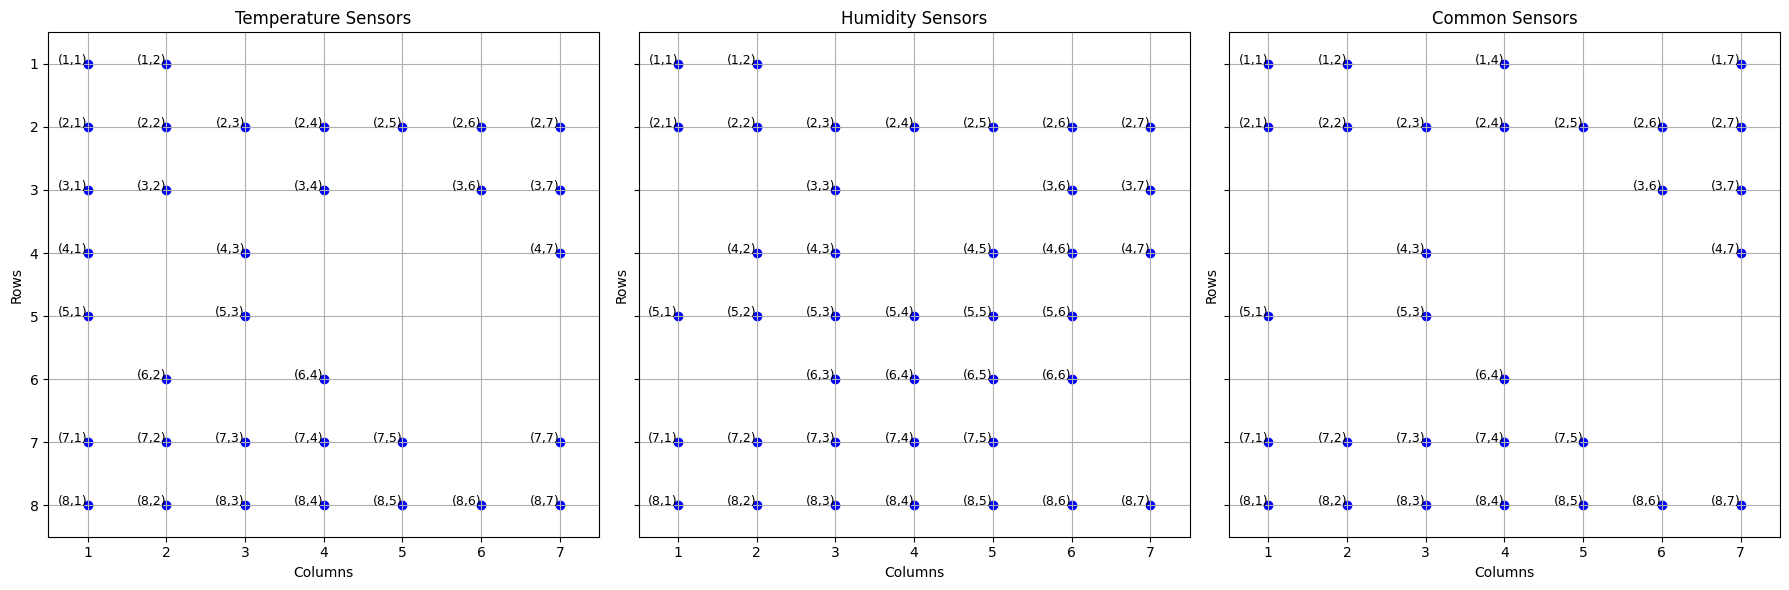

In [25]:
# Create a grid plot with three subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for selected sensors
axes[0].grid(True)
axes[0].set_xticks(range(1, 8))
axes[0].set_yticks(range(1, 9))
axes[0].set_xlim(0.5, 7.5)
axes[0].set_ylim(0.5, 8.5)
for (row, col) in selected_sensors:
    axes[0].scatter(col, row, c='blue')
    axes[0].text(col, row, f'({row},{col})', fontsize=9, ha='right')
axes[0].invert_yaxis()
axes[0].set_title("Temperature Sensors")
axes[0].set_xlabel("Columns")
axes[0].set_ylabel("Rows")

# Plot for selected humid sensors
axes[1].grid(True)
axes[1].set_xticks(range(1, 8))
axes[1].set_yticks(range(1, 9))
axes[1].set_xlim(0.5, 7.5)
axes[1].set_ylim(0.5, 8.5)
for (row, col) in selected_humid_sensors:
    axes[1].scatter(col, row, c='blue')
    axes[1].text(col, row, f'({row},{col})', fontsize=9, ha='right')
axes[1].invert_yaxis()
axes[1].set_title("Humidity Sensors")
axes[1].set_xlabel("Columns")
axes[1].set_ylabel("Rows")

# Plot for common sensors
axes[2].grid(True)
axes[2].set_xticks(range(1, 8))
axes[2].set_yticks(range(1, 9))
axes[2].set_xlim(0.5, 7.5)
axes[2].set_ylim(0.5, 8.5)
for (row, col) in common_sensors:
    axes[2].scatter(col, row, c='blue')
    axes[2].text(col, row, f'({row},{col})', fontsize=9, ha='right')
axes[2].invert_yaxis()
axes[2].set_title("Common Sensors")
axes[2].set_xlabel("Columns")
axes[2].set_ylabel("Rows")

# Display the plot
plt.tight_layout()
plt.show()

In [26]:
with open('sensor_placement.json','r') as sensor:
    data = json.load(sensor)

In [27]:
selected_sensors_list = [key for key, value in data.items() if value in common_sensors]

In [28]:
reduced_sensor_data = pd.read_csv('Combined_Data.csv')

In [29]:
non_reduced_sensors = reduced_sensor_data[~reduced_sensor_data['Sensor ID'].isin(selected_sensors_list)]

In [30]:
reduced_sensor_data = reduced_sensor_data[reduced_sensor_data['Sensor ID'].isin(selected_sensors_list)]

In [31]:
reduced_sensor_data['Sensor ID'].unique()

array(['0474D', '04754', '04757', '0475A', '0475C', '0475D', '04763',
       '04765', '0476E', '04771', '04787', '04789', '0478E', '0479B',
       '047AA', '047AD', '047B8', '047BB', '047BC', '047C2', '047C7',
       '047C9', '047CA', '047CB', '047CD', '047CE', '047D6', '047F7',
       '04802', '0480E'], dtype=object)

### Neural Networks

In [32]:
Optional_data = reduced_sensor_data.copy()
Optional_data.head()
Optional_data['Time'] = pd.to_datetime(Optional_data['Time'])
lastday = Optional_data['Time'].max().date()
last_day_records = Optional_data[Optional_data['Time'].dt.date == lastday]

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - loss: 681.7533 - val_loss: 521.2449
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 678.7693 - val_loss: 520.9846
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 675.8422 - val_loss: 520.6815
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 676.0948 - val_loss: 520.3801
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 671.5157 - val_loss: 520.0299
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 665.1636 - val_loss: 519.6008
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 675.7585 - val_loss: 519.1539
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 669.0822 - val_loss: 518.6588
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 664.2061 - val_loss: 518.1248
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 667.7487 - val_loss: 517.5881
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 660.6282 - val_loss: 516.9777
Epoch 12/300
3/3 ━━━━━━━━━━━━━━

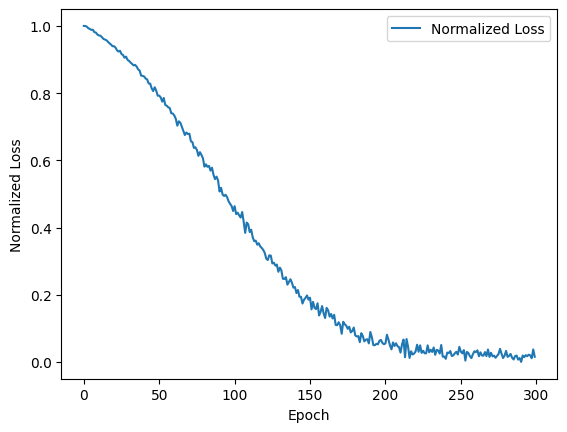

In [33]:
X_temp_scaled, y = Filling_missed_data.standerdizing_data(last_day_records,'Temperature')
model_temp_reconstructed = Filling_missed_data.neural_network_model(X_temp_scaled)
history_temp = model_temp_reconstructed.fit(X_temp_scaled, y, epochs=300, batch_size=64, validation_split=0.1)

loss_temp = model_temp_reconstructed.evaluate(X_temp_scaled, y)
print(f"Model Loss on Entire Dataset: {loss_temp}")
# Assuming `history.history['loss']` contains your loss values
loss_temp_values = history_temp.history['loss']

# Normalize the loss values
min_temp_loss = np.min(loss_temp_values)
max_temp_loss = np.max(loss_temp_values)
normalized_temp_loss = (loss_temp_values - min_temp_loss) / (max_temp_loss - min_temp_loss)

# Plot the normalized loss values
plt.plot(normalized_temp_loss, label='Normalized Loss')
plt.xlabel('Epoch')
plt.ylabel('Normalized Loss')
plt.legend()
plt.show()

In [34]:
output_dir = 'reconstructed_heatmaps/temperature'
resconstructed_temp_frames = reconstrucing_video.reconstructed_frames_generation(non_reduced_sensors, X_temp_scaled, model_temp_reconstructed, Optional_data, data, output_dir,'Temperature')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━

In [35]:
reconstrucing_video.video_generation(resconstructed_temp_frames, 'reconstructed_temp_heatmapvideo.avi')

'Video saved as: reconstructed_temp_heatmapvideo.avi'

In [36]:
# Paths to your video files
video1_path = 'reconstructed_temp_heatmapvideo.avi'
video2_path = 'sensor_heatmaps_temperature_video.avi'

# Extract frames
video1_frames = testing_videos.extract_frames(video1_path)
video2_frames = testing_videos.extract_frames(video2_path)

# Compare videos
similarity_scores = testing_videos.compare_videos(video1_frames, video2_frames)

# Compute overall similarity
overall_score = testing_videos.overall_similarity(similarity_scores)

# Perform statistical tests
statistical_results = testing_videos.perform_statistical_tests(similarity_scores)

print(f"Overall similarity score for Temperature: {overall_score}")
print(f"T-test: T-statistic for Temperature = {statistical_results['t-test'][0]}, P-value = {statistical_results['t-test'][1]}")
print(f"Wilcoxon signed-rank test for Temperature: Statistic = {statistical_results['Wilcoxon signed-rank test'][0]}, P-value = {statistical_results['Wilcoxon signed-rank test'][1]}")
print(f"Kolmogorov-Smirnov test for Temperature: Statistic = {statistical_results['Kolmogorov-Smirnov test'][0]}, P-value = {statistical_results['Kolmogorov-Smirnov test'][1]}")


Overall similarity score for Temperature: 0.7815616175708512
T-test: T-statistic for Temperature = 745.692945815936, P-value = 0.0
Wilcoxon signed-rank test for Temperature: Statistic = 186388.0, P-value = 0.10929613602535726
Kolmogorov-Smirnov test for Temperature: Statistic = 0.11200236604135361, P-value = 3.4300262730412934e-10


In [37]:
reduced_df_sorted = reduced_sensor_data.sort_values(by='Sensor ID')
reduced_df_sorted = reduced_df_sorted[~pd.isna(reduced_df_sorted['Sensor ID'])]
reduced_df_sorted['Sensor ID'] = reduced_df_sorted['Sensor ID'].astype(str)
reduced_df_sorted.reset_index(drop=True, inplace=True)

In [38]:
output_dir = 'reconstructed_heatmaps/humidity'
frames = reconstrucing_video.reconstructed_humidity_frames_generation(output_dir, reduced_df_sorted, data, 'Humidity')

In [39]:
reconstrucing_video.video_generation(frames, 'reconstructed_humid_heatmapvideo.avi')

'Video saved as: reconstructed_humid_heatmapvideo.avi'

In [40]:
# Paths to your video files
video1_path = 'reconstructed_humid_heatmapvideo.avi'
video2_path = 'sensor_heatmaps_humidity_video.avi'

# Extract frames
video1_frames = testing_videos.extract_frames(video1_path)
video2_frames = testing_videos.extract_frames(video2_path)

# Compare videos
similarity_scores = testing_videos.compare_videos(video1_frames, video2_frames)

# Compute overall similarity
overall_score = testing_videos.overall_similarity(similarity_scores)

# Perform statistical tests
statistical_results = testing_videos.perform_statistical_tests(similarity_scores)

print(f"Overall similarity score of Humidity: {overall_score}")
print(f"T-test: T-statistic for humidity = {statistical_results['t-test'][0]}, P-value = {statistical_results['t-test'][1]}")
print(f"Wilcoxon fo humidity signed-rank test: Statistic = {statistical_results['Wilcoxon signed-rank test'][0]}, P-value = {statistical_results['Wilcoxon signed-rank test'][1]}")
print(f"Kolmogorov-Smirnov of humidity test: Statistic = {statistical_results['Kolmogorov-Smirnov test'][0]}, P-value = {statistical_results['Kolmogorov-Smirnov test'][1]}")


Overall similarity score of Humidity: 0.6448349848879329
T-test: T-statistic for humidity = 427.7944907868066, P-value = 0.0
Wilcoxon fo humidity signed-rank test: Statistic = 184430.0, P-value = 0.06342823264623776
Kolmogorov-Smirnov of humidity test: Statistic = 0.16241104283970903, P-value = 5.292392719026332e-21
